**Imports**

In [1]:
import tensorflow as tf
import numpy as np
import rcwa_utils
import tensor_utils
import solver
import matplotlib.pyplot as plt

**Loss Function Definition**

In [2]:
def loss_func():

  # Global parameters dictionary.
  global params

  # Generate permittivity and permeability distributions.
  ER_t, UR_t = solver.generate_plasmonic_cylindrical_nanoposts(var_duty, params)

  # Simulate the system.
  outputs = solver.simulate(ER_t, UR_t, params)

  # Maximize the reflectance.
  ref_lambda1 = outputs['REF'][0, 0, 0]

  return (1 - ref_lambda1)

**Setup and Initialize Variables**

In [3]:
# Initialize global `params` dictionary storing optimization and simulation settings.
params = solver.initialize_params(wavelengths = [632.0],
                                  thetas = [0.0],
                                  erd = -54.5958 - 1j*21.7288, # Negative imaginary part convention for loss
                                  ers = 2.25 + 1j * 0,
                                  PQ = [11, 11],
                                  L = [50.0, 632.0],
                                  Lx = 350.0,
                                  Ly = 350.0)

# Initialize grating duty cycle variable.
var_shape = (1, params['pixelsX'], params['pixelsY'])
duty_initial = 0.75 * np.ones(shape = var_shape)
var_duty = tf.Variable(duty_initial, dtype = tf.float32)

**Optimize**

In [4]:
# Number of optimization iterations.
N = 50

# Define an optimizer and data to be stored.
opt = tf.keras.optimizers.Adam(learning_rate = 1E-3)
loss = np.zeros(N + 1)
duty = np.zeros(N + 1)
length = np.zeros(N + 1)

# Compute the initial loss.
loss[0] = loss_func().numpy()

# Optimize.
print('Optimizing...')
for i in range(N):
  opt.minimize(loss_func, var_list = [var_duty])
  loss[i + 1] = loss_func().numpy()

Optimizing...


**Display Learning Curve**

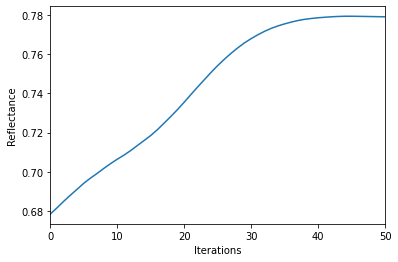

In [5]:
plt.plot(1 - loss)
plt.xlabel('Iterations')
plt.ylabel('Reflectance')
plt.xlim(0, N)
plt.show()